<a href="https://colab.research.google.com/github/ChutikarnJuntaramanee/DSA201Ass1/blob/main/Covid_Thailand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt

In [104]:
C1 = pd.read_json(r'round-1to2-by-provinces.json')
C1.rename(columns={'txn_date':'Date', 'province':'Province', 'new_case':'New Case', 'total_case':'Total Case', 'update_date':'Update date'}, inplace=True)
C1.head()

,Date,Province,New Case,Total Case,Update date
0,2020-01-12,กระบี่,0,0,NaN
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
2,2020-01-12,กาญจนบุรี,0,0,NaN
3,2020-01-12,กาฬสินธุ์,0,0,NaN
4,2020-01-12,กำแพงเพชร,0,0,NaN


In [105]:
C2 = pd.read_json(r'timeline-cases-by-provinces.json')
C2.rename(columns={'txn_date':'Date', 'province':'Province', 'new_case':'New Case', 'total_case':'Total Case', 'update_date':'Update date'}, inplace=True)
C2.head()

,Date,Province,New Case,Total Case,Update date
0,2021-04-01,กระบี่,0,27,2021-08-19 07:39:31
1,2021-04-01,กรุงเทพมหานคร,11,4855,2021-08-19 07:39:31
2,2021-04-01,กาญจนบุรี,0,16,2021-08-19 07:39:31
3,2021-04-01,กาฬสินธุ์,0,4,2021-08-19 07:39:31
4,2021-04-01,กำแพงเพชร,0,2,2021-08-19 07:39:31


In [106]:
#Group THA
THA_CASE = C1.append(C2)
THA_CASE.head()

,Date,Province,New Case,Total Case,Update date
0,2020-01-12,กระบี่,0,0,NaN
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
2,2020-01-12,กาญจนบุรี,0,0,NaN
3,2020-01-12,กาฬสินธุ์,0,0,NaN
4,2020-01-12,กำแพงเพชร,0,0,NaN


In [107]:
THA_CASE2 = THA_CASE.groupby(['Date']).sum()
THA_CASE2.head()

,New Case,Total Case
Date,,
2020-01-12,1,1
2020-01-17,1,2
2020-01-22,2,4
2020-01-24,1,5
2020-01-25,1,6


In [108]:
C1_BKK = C1[C1['Province']=='กรุงเทพมหานคร']
C2_BKK = C2[C2['Province']=='กรุงเทพมหานคร']

In [109]:
#Group BKK province
BKK_CASE = C1_BKK.append(C2_BKK)
BKK_CASE.head()

,Date,Province,New Case,Total Case,Update date
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
79,2020-01-17,กรุงเทพมหานคร,1,2,NaN
157,2020-01-22,กรุงเทพมหานคร,1,3,NaN
235,2020-01-24,กรุงเทพมหานคร,0,3,NaN
313,2020-01-25,กรุงเทพมหานคร,1,4,NaN


In [110]:
BKK_CASE2 = BKK_CASE.groupby(['Date']).sum()
BKK_CASE2.head()

,New Case,Total Case
Date,,
2020-01-12,1,1
2020-01-17,1,2
2020-01-22,1,3
2020-01-24,0,3
2020-01-25,1,4


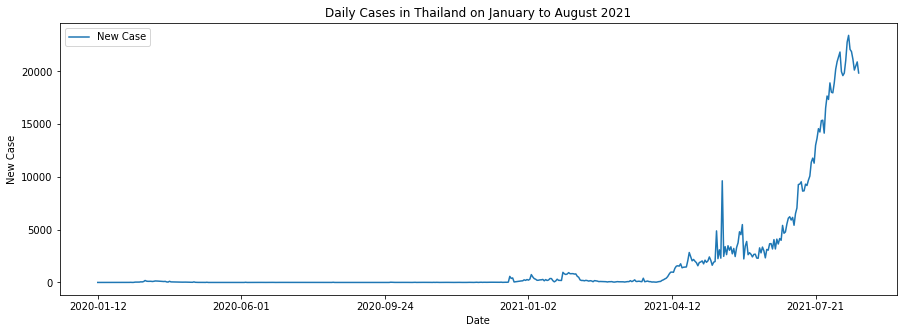

In [126]:
#Daily Num of THA
THA_CASE2.plot(y='New Case', figsize = (15,5), xlabel="Date", ylabel="New Case", title="Daily Cases in Thailand on January to August 2021")

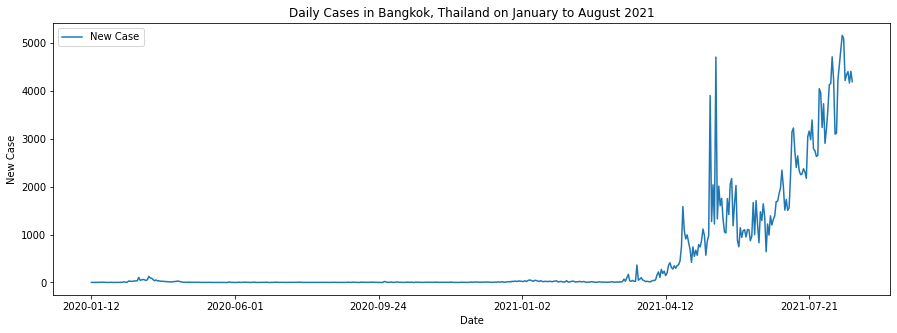

In [127]:
#Daily Num of BKK
BKK_CASE2.plot(y='New Case', figsize = (15,5), xlabel="Date", ylabel="New Case", title="Daily Cases in Bangkok, Thailand on January to August 2021")

In [115]:
# April THA
April_THA_CASE2 = THA_CASE[(THA_CASE['Date'] >= '2021-04-01') & (THA_CASE['Date'] <= '2021-08-31')]
April_THA_CASE_2021 = April_THA_CASE2.groupby('Date').sum()
April_THA_CASE_2021.head()

,New Case,Total Case
Date,,
2021-04-01,26,28889
2021-04-02,58,28947
2021-04-03,84,29031
2021-04-04,96,29127
2021-04-05,194,29321


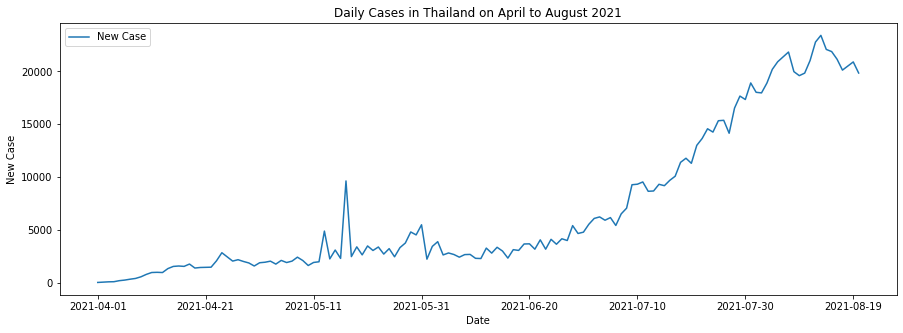

In [121]:
#Plot April THA
April_THA_CASE_2021.plot(y='New Case', figsize = (15,5), xlabel="Date", ylabel="New Case", title="Daily Cases in Thailand on April to August 2021")

In [118]:
#April BKK
April_BKK_CASE2 = BKK_CASE[(BKK_CASE['Date'] >= '2021-04-01') & (BKK_CASE['Date'] <= '2021-08-31')]
April_BKK_CASE_2021 = April_BKK_CASE2.groupby('Date').sum()
April_BKK_CASE_2021.head()

,New Case,Total Case
Date,,
2021-04-01,11,4855
2021-04-02,24,4879
2021-04-03,41,4920
2021-04-04,41,4961
2021-04-05,55,5016


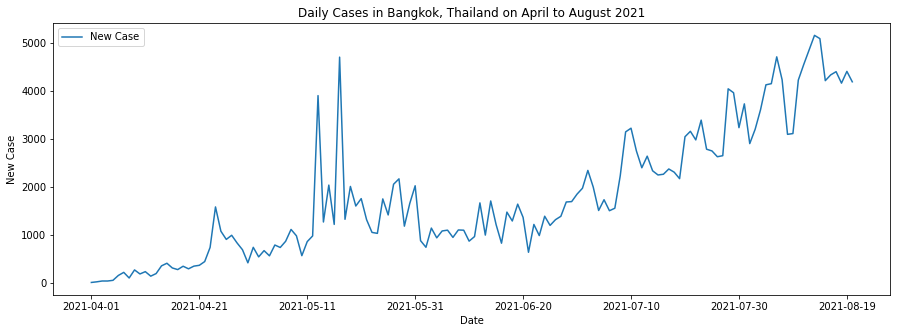

In [119]:
#Plot BKK
April_BKK_CASE_2021.plot(y='New Case', figsize = (15,5), xlabel="Date", ylabel="New Case", title="Daily Cases in Bangkok, Thailand on April to August 2021")